In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image


# get data from Collector/frames/*.jpg

frames = []
frameNumber = 0
while True:
    try:
        # look for the next frame in the frames folder stored as jpg
        image = Image.open('../Collector/dataset/' + str(frameNumber) + '.jpg')
        frameNumber += 1
        # convert to numpy array
        image = np.array(image)
        # add the image to the end of the frames array
        frames = frames + [image]

    except Exception as e:
        break

In [14]:
import cv2 as cv

processed_frames = []

# loop through the frames array and create a new array of images with the green masked
for i in range(len(frames)):
    blur = cv.GaussianBlur(frames[i], (35, 35), 0)
    # convert the image to YUV
    image = cv.cvtColor(blur, cv.COLOR_BGR2HSV)
    # isolate the green channel
    mask = cv.inRange(image, (10, 0, 40), (80, 255, 240))

    # remove small blobs from the mask
    mask = cv.erode(mask, None, iterations=4)
    
    ## convert the image to an array
    array = np.array(mask)
#
    processed_frames = processed_frames + [array]

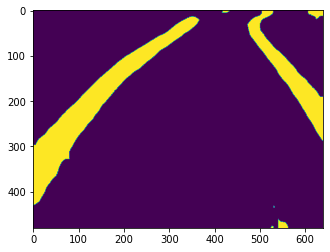

In [18]:
#show the first image
plt.imshow(processed_frames[0])

In [ ]:
import keras as ks

# create a model that produces the processed images from the raw images
model = ks.models.Sequential()
model.add(ks.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(240, 320, 1)))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dense(1))

